## World Development Indicators Database

The primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates.

http://data.worldbank.org/data-catalog/world-development-indicators

### Codes
The world bank uses codes the are strings of the form DT.DIS.PRVT.CD

from https://datahelpdesk.worldbank.org/knowledgebase/articles/201175-how-does-the-world-bank-code-its-indicators

The Catalog of Economic Time Series (CETS) is a glossary of standard acronyms for the most commonly used social and economic data maintained in the central time series databases of the World Bank. The purpose is to provide an inventory of data available in our World Development Indicators (WDI) and International Debt Statistics (IDS) databases and to suggest a general coding convention for time series data.

* Topic (2 digits)
* General Subject (3 digits)
* Specific Subject (4 digits)
* Extensions (2 digits each)

For example: DT.DIS.PRVT.CD would read "External debt disbursements by private creditors in current US dollars." 

The full listing of the codes is in the spreadsheet WDI_CETS.xls in this directory.


### Data files

The data files used in this notebook can be downloaded from 

* ZIP of csv files from: http://data.worldbank.org/data-catalog/world-development-indicators
* .xls file point to a the bottom of this page:
https://datahelpdesk.worldbank.org/knowledgebase/articles/201175-how-does-the-world-bank-code-its-indicators

The files you should have after downloading and unzipping are:

In [32]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
codes=pd.read_csv('WDI_CETS.csv')

!grep GINI WDI_CETS.csv

### Interesting series:

My goal here was to select a few indicators that measures the overall well being of a country. I found the following indicators by using "grep" on 
WDI_CETS.csv

* SP.DYN.LE00.IN	Life expectancy at birth, total (years)	Health	Mortality		
* SP.DYN.IMRT.IN	Mortality rate, infant (per 1,000 live births)	Health	Mortality		
* NY.GDP.MKTP.KD	GDP (constant 2010 US\$)	Economic Policy & Debt	National accounts	US\$ at constant 2010 prices	Aggregate indicators
* SI.POV.GINI,GINI index (World Bank estimate),Poverty,Income distribution,,

In [40]:
used_codes=['SP.DYN.LE00.IN','SP.DYN.IMRT.IN','NY.GDP.MKTP.KD','SI.POV.GINI']

### we can get more complete descriptions of each code from WDI_Series.csv

In [49]:
Series=pd.read_csv('WDI_Series.csv')
for r in Series.iterrows():
    row=r[1]
    code=row['Series Code']
    parts=code.split('.')
    ldef=row['Long definition']
    if code in used_codes:
        print code
        print ldef
        print

NY.GDP.MKTP.KD
GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars. Dollar figures for GDP are converted from domestic currencies using 2010 official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.

SI.POV.GINI
Gini index measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, s

In [50]:
# read the big data file that contains all of the series
df=pd.read_csv('big/WDI_Data.csv')
df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(383328, 61)

### Checking the completeness of the data
* There is no row without any nulls, 
* there are 12,401 rows with just one nan,
* there are 29,600 rows with at most 5 nans

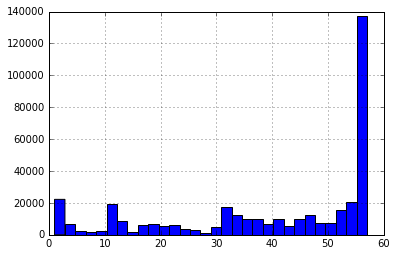

In [34]:
nans_in_row=df.isnull().sum(axis=1)
nans_in_row.hist(bins=30)

In [52]:
#extracting rows with one of the 4 codes above.

selector=[c in used_codes for c in df['Indicator Code']]
indicators=df.loc[selector,:]
print shape(indicators)
indicators.head()

(1056, 61)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
493,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.862506e+12,1.979876e+12,2.009773e+12,2.103839e+12,2.174828e+12,2.293028e+12,2.372044e+12,2.437259e+12,2.515124e+12,NaN
515,Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.850022,47.430127,48.008603,48.589765,49.174352,49.757623,...,6.920701e+01,6.941718e+01,6.961893e+01,6.981302e+01,6.999301e+01,7.017367e+01,7.036981e+01,7.056790e+01,NaN,NaN
832,Arab World,ARB,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,159.950234,155.313614,152.233048,156.521984,152.166551,148.067799,...,3.572123e+01,3.452794e+01,3.335348e+01,3.228170e+01,3.123531e+01,3.033365e+01,2.946448e+01,2.868442e+01,2.798349e+01,NaN
1945,Caribbean small states,CSS,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.125183e+10,6.209477e+10,5.990944e+10,6.076115e+10,6.138985e+10,6.217618e+10,6.319670e+10,6.356587e+10,6.371997e+10,NaN


In [55]:
from collections import Counter
country_count=Counter(indicators['Country Name'])
for name,c in country_count.items():
    if c !=4:
        print name,c
print len(country_count)

264


In [75]:
life=indicators[indicators['Indicator Code']=='SP.DYN.LE00.IN']

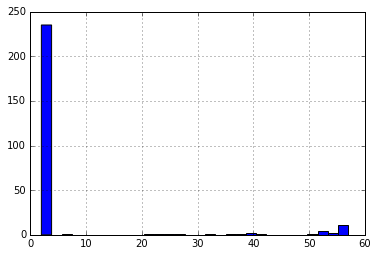

In [67]:
nans_in_row=life.isnull().sum(axis=1)
nans_in_row.hist(bins=30);

In [68]:
life.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
745,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.850022,47.430127,48.008603,48.589765,49.174352,49.757623,...,69.207008,69.417183,69.618929,69.813025,69.993010,70.173670,70.369806,70.567902,NaN,NaN
2197,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.318212,62.815201,63.271718,63.684322,64.054157,64.383200,...,71.535804,71.761474,71.979368,72.184596,72.373309,72.545485,72.702273,72.844700,NaN,NaN
3649,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,67.823762,68.263748,68.007793,68.696368,69.052440,69.276815,...,74.252383,74.577539,74.931826,75.295349,75.888475,75.993489,76.355163,76.563327,NaN,NaN
5101,Early-demographic dividend,EAR,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,45.147426,45.816490,46.426096,46.975191,47.578820,48.174957,...,66.716841,67.067960,67.419109,67.765239,68.102699,68.428539,68.741762,69.039142,NaN,NaN
6553,East Asia & Pacific,EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.226774,48.755825,49.422961,50.392785,51.584385,52.949617,...,73.584660,73.801308,74.020872,74.194146,74.352831,74.550523,74.738599,74.928507,NaN,NaN


In [71]:
life.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016'],
      dtype='object')

In [77]:
life=indicators[indicators['Indicator Code']=='SP.DYN.LE00.IN']
life=life.drop([u'Country Code', u'Indicator Name', u'Indicator Code'],axis=1)
life=life.set_index('Country Name')
life.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,46.850022,47.430127,48.008603,48.589765,49.174352,49.757623,50.329993,50.885697,51.424300,51.951877,...,69.207008,69.417183,69.618929,69.813025,69.993010,70.173670,70.369806,70.567902,NaN,NaN
Caribbean small states,62.318212,62.815201,63.271718,63.684322,64.054157,64.383200,64.676592,64.943985,65.196189,65.441809,...,71.535804,71.761474,71.979368,72.184596,72.373309,72.545485,72.702273,72.844700,NaN,NaN
Central Europe and the Baltics,67.823762,68.263748,68.007793,68.696368,69.052440,69.276815,69.526955,69.272781,69.536173,69.275899,...,74.252383,74.577539,74.931826,75.295349,75.888475,75.993489,76.355163,76.563327,NaN,NaN
Early-demographic dividend,45.147426,45.816490,46.426096,46.975191,47.578820,48.174957,48.812944,49.377464,49.923594,50.455238,...,66.716841,67.067960,67.419109,67.765239,68.102699,68.428539,68.741762,69.039142,NaN,NaN
East Asia & Pacific,48.226774,48.755825,49.422961,50.392785,51.584385,52.949617,54.480857,55.967898,57.343856,58.586759,...,73.584660,73.801308,74.020872,74.194146,74.352831,74.550523,74.738599,74.928507,NaN,NaN


In [84]:
life=life.transpose()

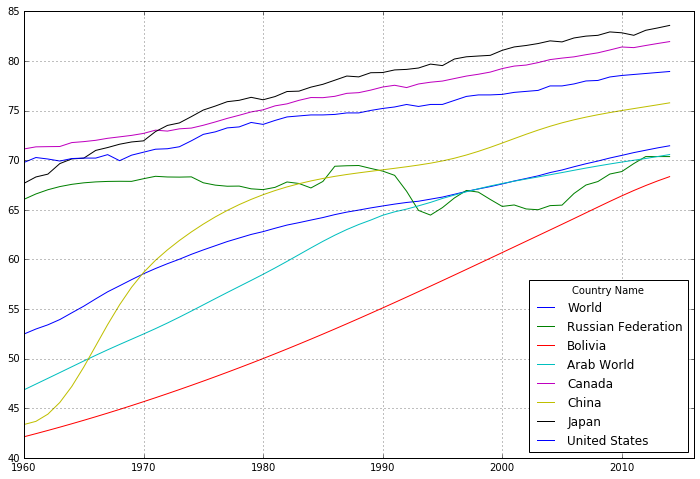

In [108]:
life[['World','Russian Federation','Bolivia','Arab World','Canada','China','Japan','United States']].plot(figsize=[12,8])
grid()

In [100]:
'United States' in country_count.keys()

True

In [109]:
#country_count.keys()